# Set game in CPMpy

Set is a popular card game in which the players have to find a __set__ in a deck of cards.

Each card has a number of shapes in a certain color with a certain fill.

The goal is to find a set as quickly as possible. A 3-pair of cards is a set if all attributes are either all equal amongst the cards or all different.
For more info, see: https://en.wikipedia.org/wiki/Set_(card_game)

In [1]:
from cpmpy import *

In [2]:
# constants
numbers = ONE, TWO, THREE = 1,2,3
colors = RED, PURPLE, GREEN = 1,2,3
shapes = DIAMOND, RECT, ELLIPSE = 1,2,3
fills = FULL, EMPTY, STRIPED = 1,2,3

In [3]:
# make the card deck
cards =[[ONE,EMPTY,GREEN,DIAMOND],
        [TWO,STRIPED,RED,RECT],
        [THREE,STRIPED,GREEN,DIAMOND],
        [THREE,FULL,RED,DIAMOND],
        [ONE,STRIPED,GREEN,DIAMOND],
        [ONE,EMPTY,RED,DIAMOND],
        [TWO,FULL,PURPLE,DIAMOND],
        [THREE,FULL,PURPLE,ELLIPSE],
        [THREE,FULL,GREEN,RECT],
        [ONE,FULL,PURPLE,DIAMOND],
        [ONE,STRIPED,PURPLE,DIAMOND],
        [ONE,FULL,GREEN,RECT]]

cards = cpm_array(cards)

given_numbers, given_fills, given_colors, given_shapes = cards[:,0], cards[:,1], cards[:,2], cards[:,3]

In [4]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Ellipse, Polygon
def plot_card(ax, number, fill, color, shape, **fig_kwargs):

    cmap = {RED:"red",GREEN:"green",PURPLE:"purple"}
    
    fill_map = {
        EMPTY : dict(edgecolor=cmap[color], facecolor="white"),
        FULL : dict(edgecolor=cmap[color], facecolor=cmap[color]),
        STRIPED : dict(edgecolor=cmap[color], facecolor="white",hatch=r"//")
    }

    figw, figh = 5,7
    # fig, ax = plt.subplots(1,1,figsize=(5,7),*fig_kwargs)
    ax.set_xlim(0,figw), ax.set_ylim(0,figh)
    ax.set_xticks([]), ax.set_yticks([])

    width, height = 2.6,1 # shape dimensions
    spacing = 0.5 # spacing between shapes

    tot_y = number * (height + spacing) + spacing
    space_p_shape = tot_y  / number

    for n in range(number):
        y = space_p_shape * n + 0.5*space_p_shape + (7 - tot_y) / 2
        if shape == RECT:
            patch = Rectangle((0.5*width,y-height/2),width, height, **fill_map[fill])
        elif shape == ELLIPSE:
            patch = Ellipse((width, y), width, height, **fill_map[fill])
        elif shape == DIAMOND:
            xys=  [[0.5*width,y],[width, y+height/2],[1.5*width, y],[width,y-height/2]]
            patch = Polygon(xys, **fill_map[fill])
        
        ax.add_patch(patch)
    
    return ax

from math import floor, ceil, sqrt
def plot_board(cards, highlight=[]):
    fig, axes = plt.subplots(floor(sqrt(len(cards))), ceil(sqrt(len(cards))))
    for i, card in enumerate(cards):
        idx = (i // 4, i % 4)
        ax = plot_card(axes[idx],*card)
        axes[idx] = ax
        if i in highlight: _ = [ax.spines[s].set_color("red") for s in ax.spines]

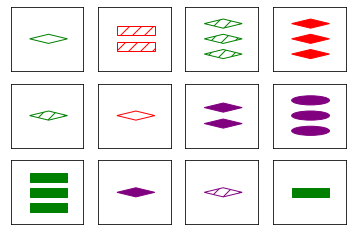

In [5]:
plot_board(cards)

### Creating the CSP model

In [6]:
# decision variables
n_cards = len(cards)
winning_cards = intvar(0,n_cards-1,shape=3, name="winning")
c1,c2,c3 = winning_cards

In [7]:
# constraints
model = Model()
model += alldifferent(winning_cards)

# numbers must be all equal or all different
winning_nbs = [given_numbers[c1], given_numbers[c2], given_numbers[c3]]
model += allequal(winning_nbs) | alldifferent(winning_nbs)

# numbers must be all equal or all different
winning_fills = [given_fills[c1], given_fills[c2], given_fills[c3]]
model += allequal(winning_fills) | alldifferent(winning_fills)

# numbers must be all equal or all different
winning_colors = [given_colors[c1], given_colors[c2], given_colors[c3]]
model += allequal(winning_colors) | alldifferent(winning_colors)

# numbers must be all equal or all different
winning_shapes = [given_shapes[c1], given_shapes[c2], given_shapes[c3]]
model += allequal(winning_shapes) | alldifferent(winning_shapes)

### Solving the model

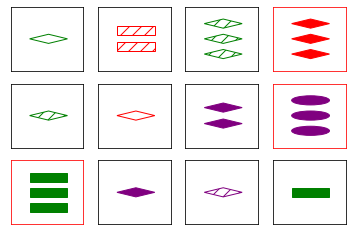

In [8]:
assert model.solve()
plot_board(cards, highlight=winning_cards.value())

4

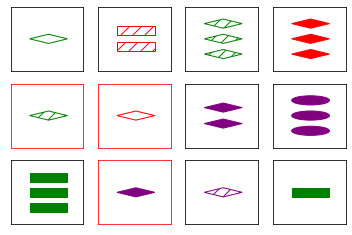

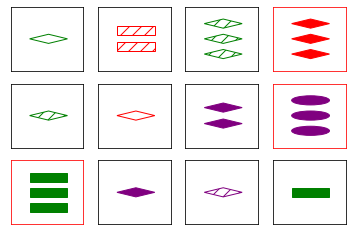

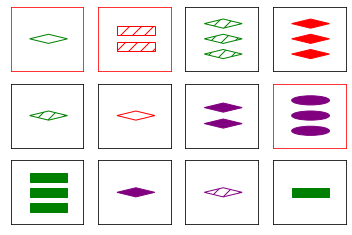

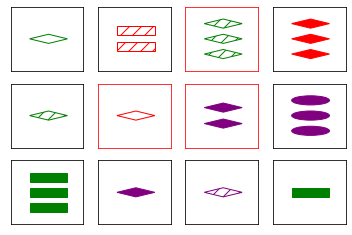

In [9]:
# finding all solutions
# static symmetry breaking
model += winning_cards[0] <  winning_cards[1]
model += winning_cards[1] < winning_cards[2]

model.solveAll(display=lambda : plot_board(cards, highlight=winning_cards.value()))